# 4.10 Instacart Final Task

## Contents

### Import Libraries and Dataframes
### Create regional segmentation of data
### Determine whether there’s a difference in spending habits between the different U.S. regions
### Create an exclusion flag for low-activity customers
### Customer profiling
### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### Compare customer profiles with regions and departments
### Visualizations

In [2]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# assign path
path = r'/Users/alden/Desktop/07-2024 Instacart Basket Analysis'

In [4]:
# import dataframe
ords_prods_cust = pd.read_pickle (os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# 3. Create a regional segmentation of the data

In [6]:
ords_prods_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,prices,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,7.0,196,1,0,both,...,9.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,7.0,14084,2,0,both,...,12.5,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,7.0,12427,3,0,both,...,4.4,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,7.0,26088,4,0,both,...,4.7,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,7.0,26405,5,0,both,...,1.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
# Assign Northeast Region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Maine', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'New Hampshire', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Vermont', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Pennsylvania', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Massachusetts', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Rhode Island', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Connecticut', 'region'] = 'Northeast'

In [8]:
# Assign Midwest Region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Wisconsin', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Michigan', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Illinois', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Indiana', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Ohio', 'region'] = 'Midwest'

In [9]:
# Assign Midwest Region2
ords_prods_cust.loc[ords_prods_cust['state'] == 'North Dakota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'South Dakota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Nebraska', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Kansas', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Minnesota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Iowa', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Missouri', 'region'] = 'Midwest'

In [10]:
# Assign South Region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Delaware', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Maryland', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'District of Columbia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Virginia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'West Virginia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'North Carolina', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'South Carolina', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Georgia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Florida', 'region'] = 'South'

In [11]:
# Assign South Region2
ords_prods_cust.loc[ords_prods_cust['state'] == 'Kentucky', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Tennessee', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Mississippi', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Alabama', 'region'] = 'South'

In [12]:
# Assign South Region3
ords_prods_cust.loc[ords_prods_cust['state'] == 'Oklahoma', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Texas', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Arkansas', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Louisiana', 'region'] = 'South'

In [13]:
# Assign West Region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Idaho', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Montana', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Wyoming', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Nevada', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Utah', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Colorado', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Arizona', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'New Mexico', 'region'] = 'West'

In [14]:
# Assign West Region2
ords_prods_cust.loc[ords_prods_cust['state'] == 'Alaska', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Washington', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Oregon', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'California', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Hawaii', 'region'] = 'West'

In [15]:
ords_prods_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,7.0,196,1,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,7.0,14084,2,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,7.0,12427,3,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,7.0,26088,4,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,7.0,26405,5,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


## Determine whether there’s a difference in spending habits between the different U.S. regions

In [17]:
#CHATGPT HELP
print(ords_prods_cust.columns)


Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region'],
      dtype='object')


In [18]:
#chatgpt help
# Step 1: Calculate the number of orders for each customer (user_id)
order_counts = ords_prods_cust.groupby('user_id')['order_id'].nunique()

# Step 2: Create the 'spender_flag' column
# Customers with fewer than 5 orders will be flagged as 'low activity'
ords_prods_cust['spender_flag'] = ords_prods_cust['user_id'].map(order_counts >= 5)

# Check the DataFrame to ensure 'spender_flag' is created
print(ords_prods_cust[['user_id', 'spender_flag']].drop_duplicates().head())


     user_id  spender_flag
0          1          True
59         2          True
254        3          True
342        4          True
360        5         False


In [19]:
# Create the crosstab
crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spender_flag'], dropna=False)

# Check the result
print(crosstab)


spender_flag   False     True 
region                        
Midwest       335822   7261503
Northeast     199183   4259878
South         480773  10311112
West          365686   7927227
NaN            58877   1204798


In [20]:
# Crosstab Region to spending flag
crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spender_flag'], dropna = False)

In [21]:
crosstab.to_clipboard()

In [22]:
# save changes to ords_prods_cust
ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

# 4.  Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [24]:
#chatgpt 
# Step 1: Calculate the number of orders for each customer (user_id)
order_counts = ords_prods_cust.groupby('user_id')['order_id'].nunique()

# Step 2: Map the order counts back to the DataFrame
ords_prods_cust['max_order'] = ords_prods_cust['user_id'].map(order_counts)

# Check if the 'max_order' column was created successfully
print(ords_prods_cust[['user_id', 'max_order']].drop_duplicates().head())


     user_id  max_order
0          1         10
59         2         14
254        3         12
342        4          5
360        5          4


In [25]:
#gpt
# Step 1: Create the 'activity_flag' column based on the 'max_order' column
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

# Step 2: Check if 'activity_flag' is created successfully
print(ords_prods_cust[['user_id', 'max_order', 'activity_flag']].head())


   user_id  max_order           activity_flag
0        1         10  high-activity customer
1        1         10  high-activity customer
2        1         10  high-activity customer
3        1         10  high-activity customer
4        1         10  high-activity customer


In [26]:
#CHATGPT # Print column names to check if 'activity_flag' exists
print(ords_prods_cust.columns)

# Optionally, inspect the first few rows to ensure the flag column was created
print(ords_prods_cust[['user_id', 'max_order', 'activity_flag']].head())


Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'spender_flag', 'max_order', 'activity_flag'],
      dtype='object')
   user_id  max_order           activity_flag
0        1         10  high-activity customer
1        1         10  high-activity customer
2        1         10  high-activity customer
3        1         10  high-activity customer
4        1         10  high-activity customer


In [27]:
# Create the crosstab for region vs. activity flag
crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['activity_flag'], dropna=False)

# Check the result
print(crosstab)


activity_flag  high-activity customer  low-activity customer
region                                                      
Midwest                       7261503                 335822
Northeast                     4259878                 199183
South                        10311112                 480773
West                          7927227                 365686
NaN                           1204798                  58877


In [28]:
# Create a flag for customers with less than 5 orders
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [29]:
ords_prods_cust['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964518
low-activity customer      1440341
Name: count, dtype: int64

In [30]:
# Exclude low-activity customers from the dataframe
df_excluded = ords_prods_cust[ords_prods_cust['activity_flag'] != 'low-activity customer']

In [31]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

# 5. & 6. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. Then create images

## Income

In [34]:
# Create an income group variable
df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'
df_excluded.loc[(df_excluded['income'] > 55000) & (df_excluded['income'] <= 150000), 'income_group'] = 'middle-income'
df_excluded.loc[df_excluded['income'] > 150000, 'income_group'] = 'high-income'

/var/folders/0g/xr0wqnt55l9gzqjgx49c_h8r0000gp/T/ipykernel_5309/1030381792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'


In [35]:
# Check the counts of income groups
df_excluded['income_group'].value_counts(dropna = False)

income_group
middle-income    22617631
low-income        4452378
high-income       3894509
Name: count, dtype: int64

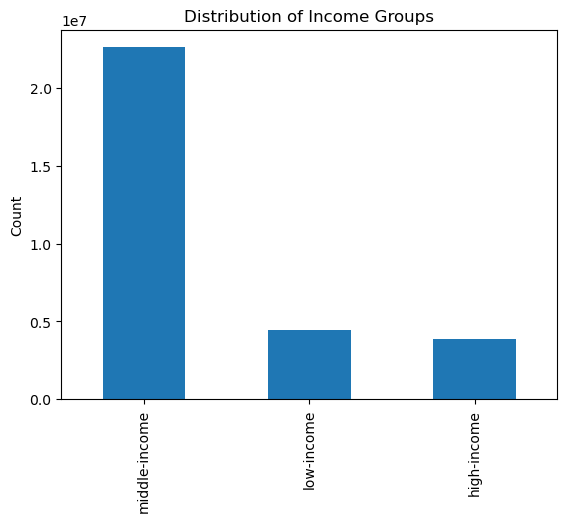

In [36]:
# Make a bar chart showing the distribution of income groups
income_group_counts = df_excluded['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [37]:
# Export the bar chart
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_bar.png'))

## Age

In [39]:
# Create an age group variable
df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'
df_excluded.loc[(df_excluded['age'] > 25) & (df_excluded['age'] <= 44), 'age_group'] = 'adult'
df_excluded.loc[(df_excluded['age'] > 44) & (df_excluded['age'] <= 64), 'age_group'] = 'middle-aged'
df_excluded.loc[df_excluded['age'] > 64, 'age_group'] = 'senior'

/var/folders/0g/xr0wqnt55l9gzqjgx49c_h8r0000gp/T/ipykernel_5309/2854730798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'


In [40]:
# Check value counts for each age group
age_group_counts = df_excluded['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    9690024
adult          9214441
senior         8195535
young adult    3864518
Name: count, dtype: int64

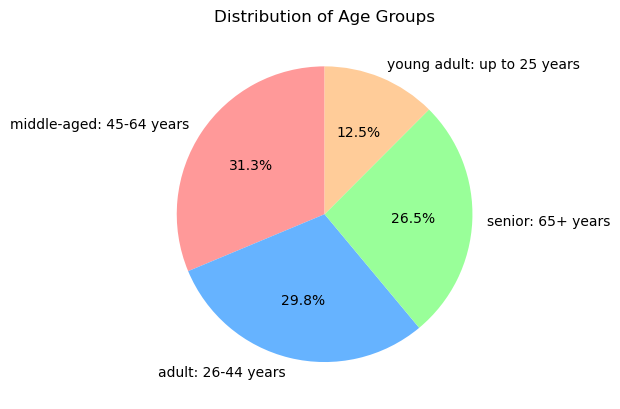

In [41]:
# Make a pie chart showing the distribution of age groups
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [42]:
# Export chart
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

## Dependants

In [44]:
# Create a dependents flag
df_excluded.loc[df_excluded['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'
df_excluded.loc[df_excluded['n_dependants'] >= 1, 'dependants_flag'] = 'has dependants'

/var/folders/0g/xr0wqnt55l9gzqjgx49c_h8r0000gp/T/ipykernel_5309/2552754020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'


In [45]:
# Check value counts
dependant_counts = df_excluded['dependants_flag'].value_counts(dropna = False)
dependant_counts

dependants_flag
has dependants    23224872
no dependants      7739646
Name: count, dtype: int64

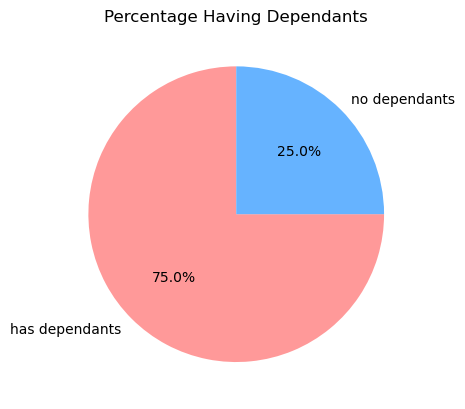

In [46]:
# Make a pie chart showing the percentage of dependants
dependants_pie = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('Percentage Having Dependants')
plt.show()

In [47]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

In [48]:
# import dataframe
df_excluded = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_excluded.pkl'))

In [49]:
list(df_excluded.columns.values)

['order_id',
 'user_id',
 'order_number',
 'order_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 '_merge',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'first_name',
 'surname',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 'region',
 'spender_flag',
 'max_order',
 'activity_flag',
 'income_group',
 'age_group',
 'dependants_flag']

## Loyalty vs Age Group

In [86]:
#gpt help

# List the columns to check if 'loyalty_flag' exists
print(df_excluded.columns)

# Check if 'loyalty_flag' exists specifically
print('loyalty_flag' in df_excluded.columns)  # Should return True if the column exists


Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'spender_flag', 'max_order', 'activity_flag', 'income_group',
       'age_group', 'dependants_flag'],
      dtype='object')
False


In [90]:
#gpt
# Step 1: Calculate total spending per user
total_spending = df_excluded.groupby('user_id')['prices'].sum().reset_index()

# Merge the total spending into the main dataframe
df_excluded = pd.merge(df_excluded, total_spending, on='user_id', suffixes=('', '_total'))

# Step 2: Create the 'loyalty_flag' based on total spending
df_excluded['loyalty_flag'] = df_excluded['prices_total'].apply(
    lambda x: 'Loyal' if x > 1000 else 'Non-loyal'
)

# Step 3: Verify the creation of the 'loyalty_flag' column
print(df_excluded[['user_id', 'loyalty_flag']].head())

# Step 4: Create the crosstab for 'loyalty_flag' vs 'age_group'
loyalty_age_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['age_group'], dropna=False)

# Step 5: Display the crosstab result
print(loyalty_age_cross)


   user_id loyalty_flag
0        1    Non-loyal
1        1    Non-loyal
2        1    Non-loyal
3        1    Non-loyal
4        1    Non-loyal
age_group       adult  middle-aged   senior  young adult
loyalty_flag                                            
Loyal         7508466      7856988  6637433      3139695
Non-loyal     1705975      1833036  1558102       724823


(array([0, 1]), [Text(0, 0, 'Loyal'), Text(1, 0, 'Non-loyal')])

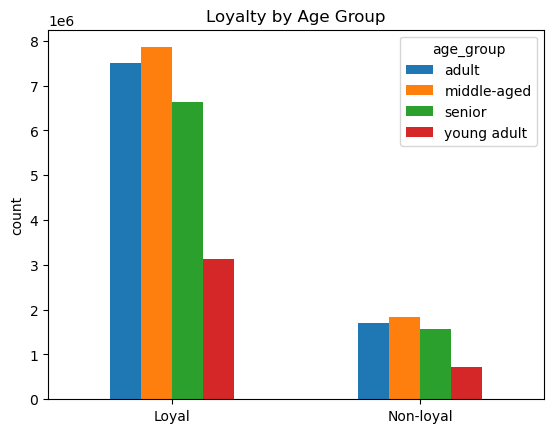

In [98]:
# bar chart
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [100]:
# Export the chart
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_group_bar.png'))

## Spending vs Age Group

In [102]:
# Crosstab spending with age group
spending_age_cross = pd.crosstab(df_excluded['spender_flag'], df_excluded['age_group'], dropna = False)
spending_age_cross

age_group,adult,middle-aged,senior,young adult
spender_flag,,,,
True,9214441,9690024,8195535,3864518


(array([0]), [Text(0, 0, 'True')])

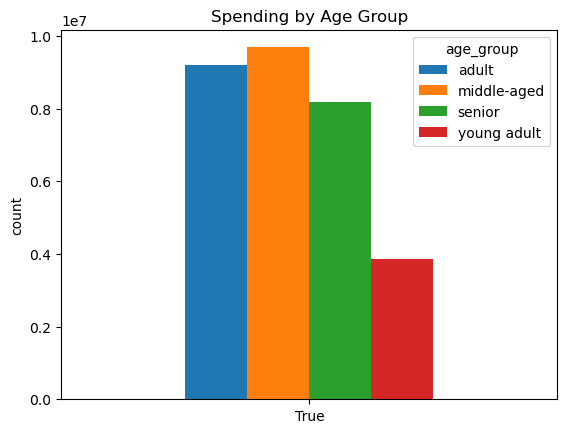

In [104]:
# bar chart
spending_age_bar = spending_age_cross.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [106]:
# Export the chart
spending_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_age_group_bar.png'))

## Redo regional spending with low activity customers excluded

In [109]:
df_excluded.loc[df_excluded['state'] == 'Pennsylvania', 'region'] = 'Northeast'

In [111]:
# Crosstab Region to spending flag
region_spending_cross = pd.crosstab(df_excluded['region'], df_excluded['spender_flag'], dropna = False)

In [113]:
region_spending_cross

spender_flag,True
region,
Midwest,7261503
Northeast,4259878
South,10311112
West,7927227
NaN,1204798


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West'),
  Text(4, 0, 'nan')])

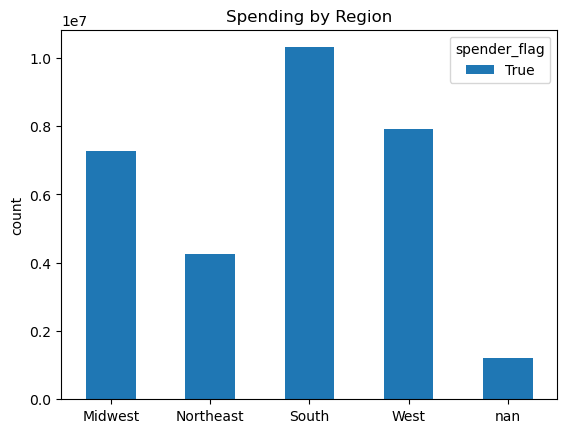

In [115]:
# bar chart
region_spending_bar = region_spending_cross.plot.bar()
plt.title('Spending by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [117]:
# Export the chart
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending_bar.png'))

## Orders by Department

In [120]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [122]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [126]:
#gpt
# Check if 'Unnamed: 0' is in the columns list
print(df_excluded.columns)

# Safely drop the columns
df_excluded.drop(columns=['_merge', 'Unnamed: 0'], errors='ignore', inplace=True)

# Verify if columns are dropped
print(df_excluded.columns)


Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'spender_flag', 'max_order', 'activity_flag', 'income_group',
       'age_group', 'dependants_flag', 'prices_total', 'loyalty_flag'],
      dtype='object')
Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'spender_flag', 'max_order', 'activity_flag', 'income_group',
       'age_group', 'dependants_flag

In [132]:
#GPT
# Print the column names to ensure 'department_id' exists in both DataFrames
print("Columns in df_excluded:", df_excluded.columns)
print("Columns in dept:", dept.columns)


Columns in df_excluded: Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'spender_flag', 'max_order', 'activity_flag', 'income_group',
       'age_group', 'dependants_flag', 'prices_total', 'loyalty_flag'],
      dtype='object')
Columns in dept: Index(['Unnamed: 0', 'department'], dtype='object')


In [134]:
#gpt
# Inspect the first few rows of dept to check the contents of 'Unnamed: 0'
print(dept.head())


   Unnamed: 0 department
0           1     frozen
1           2      other
2           3     bakery
3           4    produce
4           5    alcohol


In [136]:
#gpt 
dept.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)


In [138]:
#gpt 
df_final_merged = df_excluded.merge(dept, on='department_id', indicator='created')


In [140]:
#gpt
# Inspect column names of both DataFrames
print("Columns in df_excluded:", df_excluded.columns)
print("Columns in dept:", dept.columns)

# Strip any leading/trailing spaces from column names
df_excluded.columns = df_excluded.columns.str.strip()
dept.columns = dept.columns.str.strip()

# Attempt the merge again
df_final_merged = df_excluded.merge(dept, on='department_id', indicator='created')

# Check the result
print(df_final_merged.head())


Columns in df_excluded: Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'spender_flag', 'max_order', 'activity_flag', 'income_group',
       'age_group', 'dependants_flag', 'prices_total', 'loyalty_flag'],
      dtype='object')
Columns in dept: Index(['department_id', 'department'], dtype='object')
   order_id  user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329        1             1                  2                  8   
1   2539329        1             1                  2                  8   
2   2539329        1             1                  2                  8   
3   2539329        1             1                  2                  8   


In [142]:
df_final_merged = df_excluded.merge(dept, on='department_id', indicator='created')

In [144]:
# Exporting new dataframe with department merged 
df_final_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

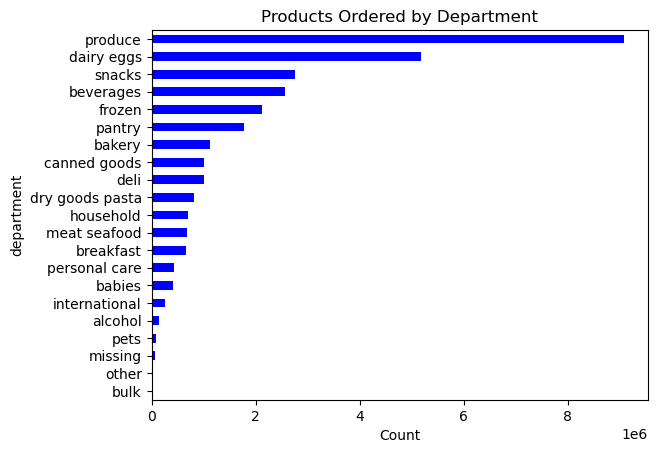

In [146]:
# bar chart frequency of orders vs department
depts_bar = df_final_merged['department'].value_counts(ascending=True).plot(kind='barh', color='blue', xlabel = 'Count', title='Products Ordered by Department')

In [148]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar.png'))

## Age vs Department

In [151]:
# crosstab age group vs department
age_dept_cross = pd.crosstab(df_final_merged['age_group'], df_final_merged['department'], dropna = False)
age_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,42167,123044,334152,754849,198803,9902,302479,1549126,299970,243702,...,207552,76675,199124,19130,10198,529307,125522,27034,2712586,824677
middle-aged,46578,129908,350802,814685,211272,10298,315772,1612489,314107,256920,...,218858,79743,209927,20340,10811,558929,134733,28293,2830851,867560
senior,36693,106202,295997,684020,175296,8945,267509,1368072,265199,217316,...,186629,67199,181150,16915,8945,472383,111052,25115,2408104,728549
young adult,19188,51234,139873,318343,85477,4306,126312,647493,124555,104198,...,86814,32374,84580,8383,4456,222086,52996,12618,1127726,345616


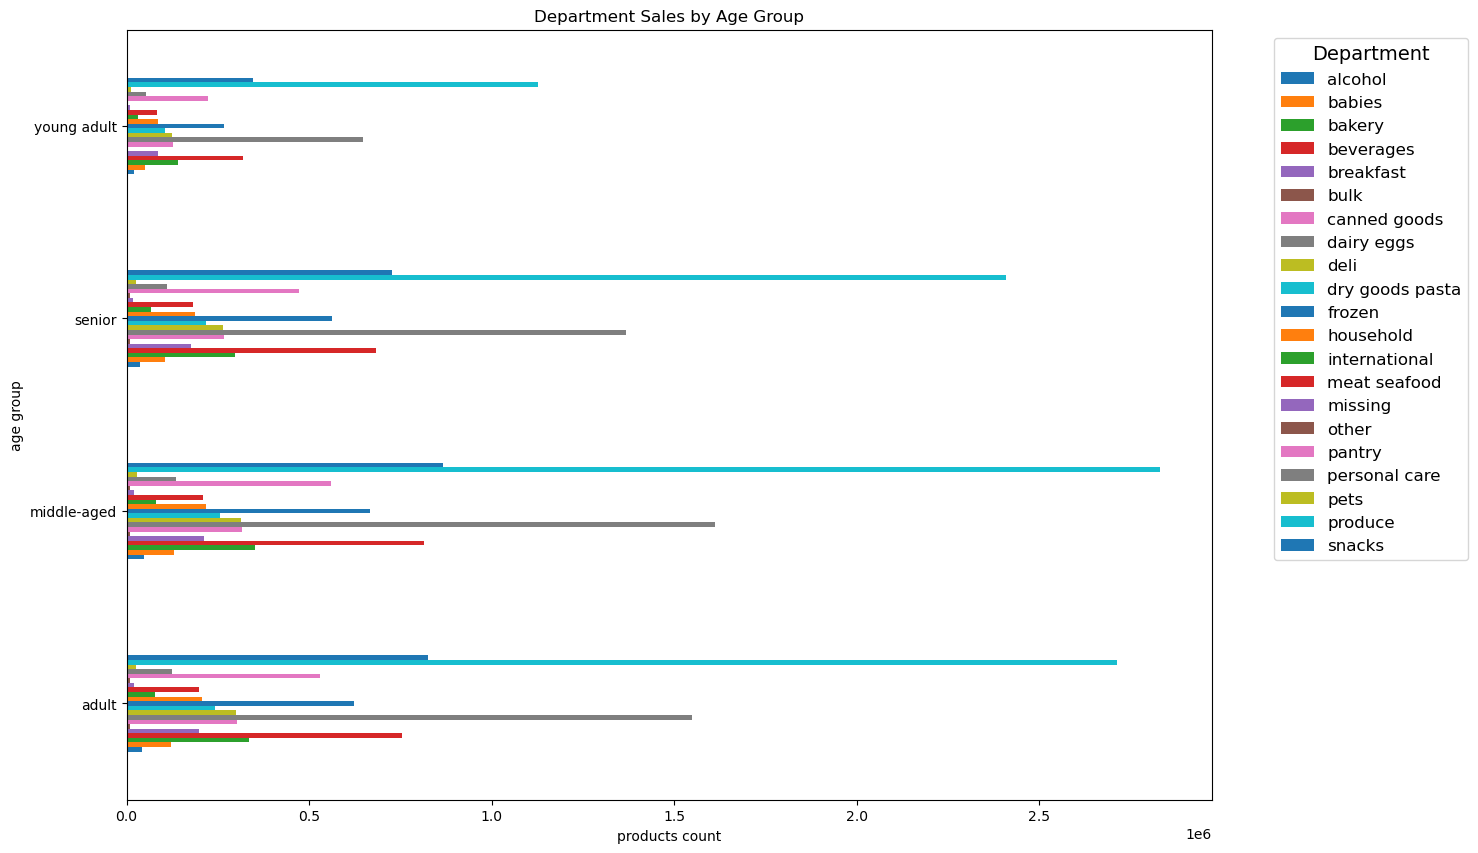

In [153]:
# bar chart
age_dept_bar = age_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [155]:
# Export bar chart
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depts_bar.png'))

## Income vs Department

In [158]:
# crosstab income group vs department
income_dept_cross = pd.crosstab(df_final_merged['income_group'], df_final_merged['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,24067,52999,148428,313324,83416,3671,132387,659148,125883,106335,...,92672,32822,91514,8253,4554,231915,53527,12991,1134488,305775
low-income,22199,43438,144084,479740,116540,5974,112945,680815,141758,92401,...,111507,30240,54717,8902,4958,226221,62888,11782,1139548,673753
middle-income,98360,313951,828312,1778833,470892,23806,766740,3837217,736190,623400,...,495674,192929,528550,47613,24898,1324569,307888,68287,6805231,1786874


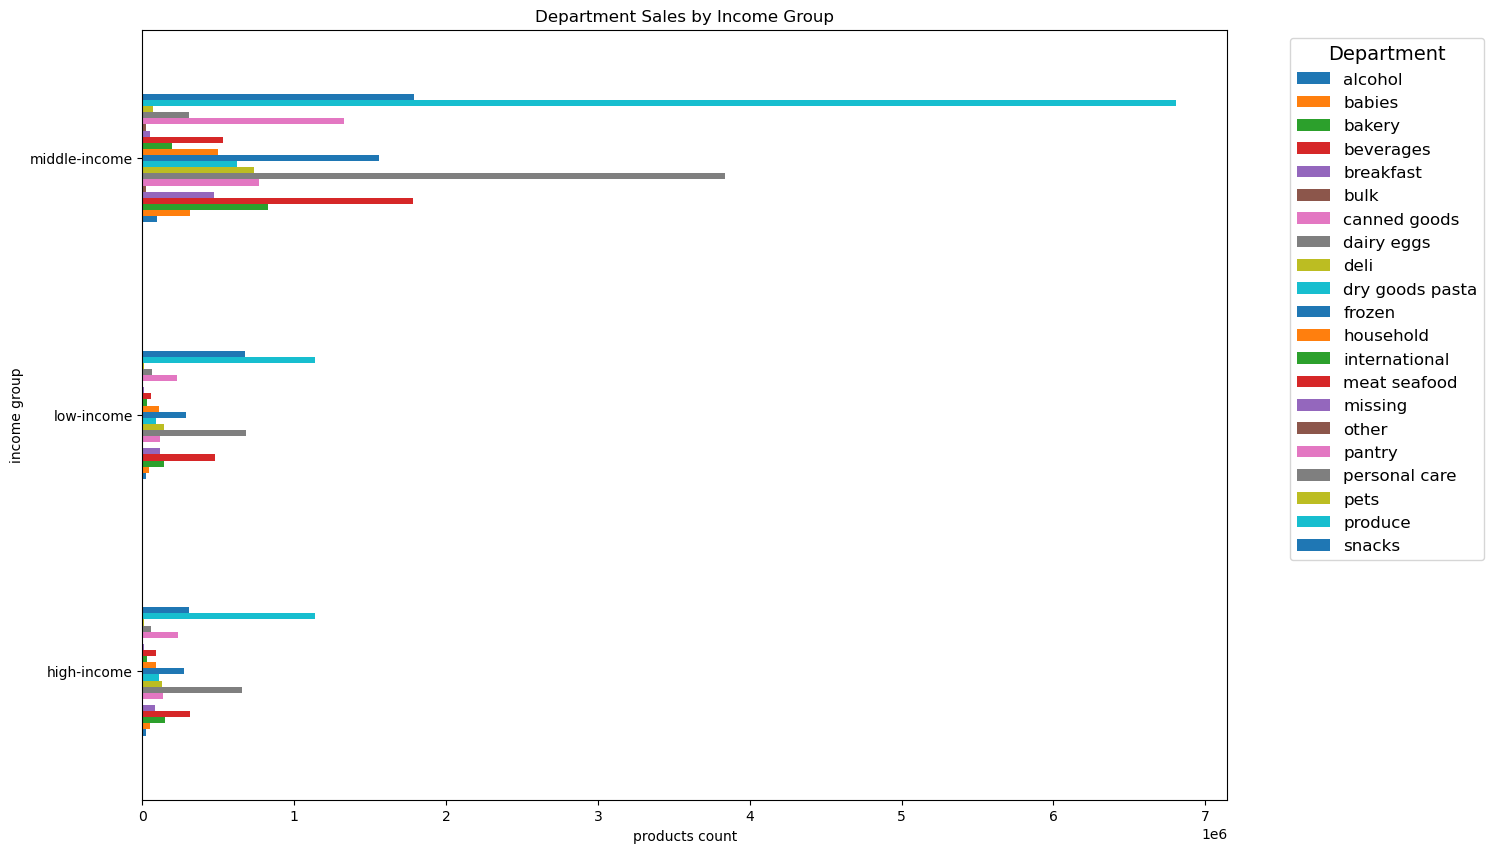

In [159]:
# bar chart
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [162]:
# Export bar chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_depts_bar.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [169]:
#gpt
print(df_final_merged.columns)


Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'spender_flag', 'max_order', 'activity_flag', 'income_group',
       'age_group', 'dependants_flag', 'prices_total', 'loyalty_flag',
       'department', 'created'],
      dtype='object')


In [171]:
#GPT Calculate customer frequency (number of unique orders per user)
df_final_merged['customer_frequency'] = df_final_merged.groupby('user_id')['order_number'].transform('nunique')



In [173]:
print(df_final_merged[['user_id', 'customer_frequency']].head())


   user_id  customer_frequency
0        1                  10
1        1                  10
2        1                  10
3        1                  10
4        1                  10


In [175]:
#GPT
customer_profile = df_final_merged.groupby([
    'user_id', 'gender', 'state', 'region', 'n_dependants', 'fam_status', 
    'age_group', 'order_number', 'order_day_of_week', 'order_hour_of_day', 
    'loyalty_flag', 'customer_frequency', 'dependants_flag', 'income_group', 
    'spender_flag'])['prices'].sum().reset_index()


In [177]:
print(customer_profile.head())


   user_id  gender    state region  n_dependants fam_status age_group  \
0        1  Female  Alabama  South             3    married     adult   
1        1  Female  Alabama  South             3    married     adult   
2        1  Female  Alabama  South             3    married     adult   
3        1  Female  Alabama  South             3    married     adult   
4        1  Female  Alabama  South             3    married     adult   

   order_number  order_day_of_week  order_hour_of_day loyalty_flag  \
0             1                  2                  8    Non-loyal   
1             2                  3                  7    Non-loyal   
2             3                  3                 12    Non-loyal   
3             4                  4                  7    Non-loyal   
4             5                  4                 15    Non-loyal   

   customer_frequency dependants_flag income_group  spender_flag  prices  
0                  10  has dependants   low-income          True 

In [179]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_final_merged.groupby(['user_id', 'gender', 'state', 'region', 'n_dependants', 'fam_status', 'age_group', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'customer_frequency', 'dependants_flag', 'income_group', 'spender_flag'])['prices'].sum().reset_index()

KeyError: 'orders_day_of_week'

In [181]:
customer_profile.head()

,user_id,gender,state,region,n_dependants,fam_status,age_group,order_number,order_day_of_week,order_hour_of_day,loyalty_flag,customer_frequency,dependants_flag,income_group,spender_flag,prices
0,1,Female,Alabama,South,3,married,adult,1,2,8,Non-loyal,10,has dependants,low-income,True,31.6
1,1,Female,Alabama,South,3,married,adult,2,3,7,Non-loyal,10,has dependants,low-income,True,35.4
2,1,Female,Alabama,South,3,married,adult,3,3,12,Non-loyal,10,has dependants,low-income,True,28.2
3,1,Female,Alabama,South,3,married,adult,4,4,7,Non-loyal,10,has dependants,low-income,True,26.0
4,1,Female,Alabama,South,3,married,adult,5,4,15,Non-loyal,10,has dependants,low-income,True,57.0


In [183]:
# Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [185]:
customer_agg

order_number           prices                   
                 max min  mean    max    min        mean
user_id                                                 
1                 10   1   5.5   63.1   25.0   37.570000
2                 14   1   7.5  213.1   19.0  104.685714
3                 12   1   6.5  107.2   30.7   60.116667
4                  5   1   3.0   63.4   10.8   29.540000
7                 20   1  10.5  166.7    6.3   76.910000
...              ...  ..   ...    ...    ...         ...
206203             5   1   3.0  216.3  126.6  169.900000
206206            67   1  34.0  157.3    9.6   32.526866
206207            16   1   8.5  200.8   42.8  101.931250
206208            49   1  25.0  238.5   38.7  115.595918
206209            13   1   7.0  131.5   11.1   70.046154

[156297 rows x 6 columns]

In [187]:
# Aggregate variables for customer profiles for usage frequency
freq_agg = df_excluded.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [189]:
freq_agg

order_number                days_since_prior_order                
                 max min       mean                    max  min       mean
user_id                                                                   
1                 10   1   5.813559                   30.0  0.0  19.135593
2                 14   1   8.035897                   30.0  3.0  15.369231
3                 12   1   6.000000                   21.0  7.0  10.977273
4                  5   1   2.888889                   21.0  0.0  13.500000
7                 20   1   9.645631                   30.0  2.0  13.165049
...              ...  ..        ...                    ...  ...        ...
206203             5   1   2.983193                   30.0  7.0  25.016807
206206            67   1  38.007018                   15.0  0.0   4.084211
206207            16   1   8.116592                   30.0  1.0  14.031390
206208            49   1  25.505170                   20.0  0.0   7.434269
206209            13   1   6.937984                   30.0  3.0  18.937984

[162627 rows x 6 columns]

# 8. Compare customer profiles with regions and departments

## Region vs Departmant

In [193]:
# crosstab age group vs department
region_dept_cross = pd.crosstab(df_final_merged['region'], df_final_merged['department'], dropna = False)
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261751,598977,156155,7929,237459,1212489,234464,193463,...,166991,60666,158260,15563,7983,420334,100398,21358,2134111,645143
Northeast,20120,56870,155882,364615,92420,4471,137738,711976,139808,111939,...,96809,35265,91595,8970,4925,244582,58664,13150,1239418,384202
South,48812,139509,371618,859417,223170,11180,337456,1723015,333617,272813,...,230059,84649,224120,21787,11579,591754,142493,29909,3027474,916776
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329
NaN,4897,15840,43418,98314,25484,1128,39198,202640,38590,31878,...,27794,9413,26976,2542,1342,68149,16101,4584,353586,108952


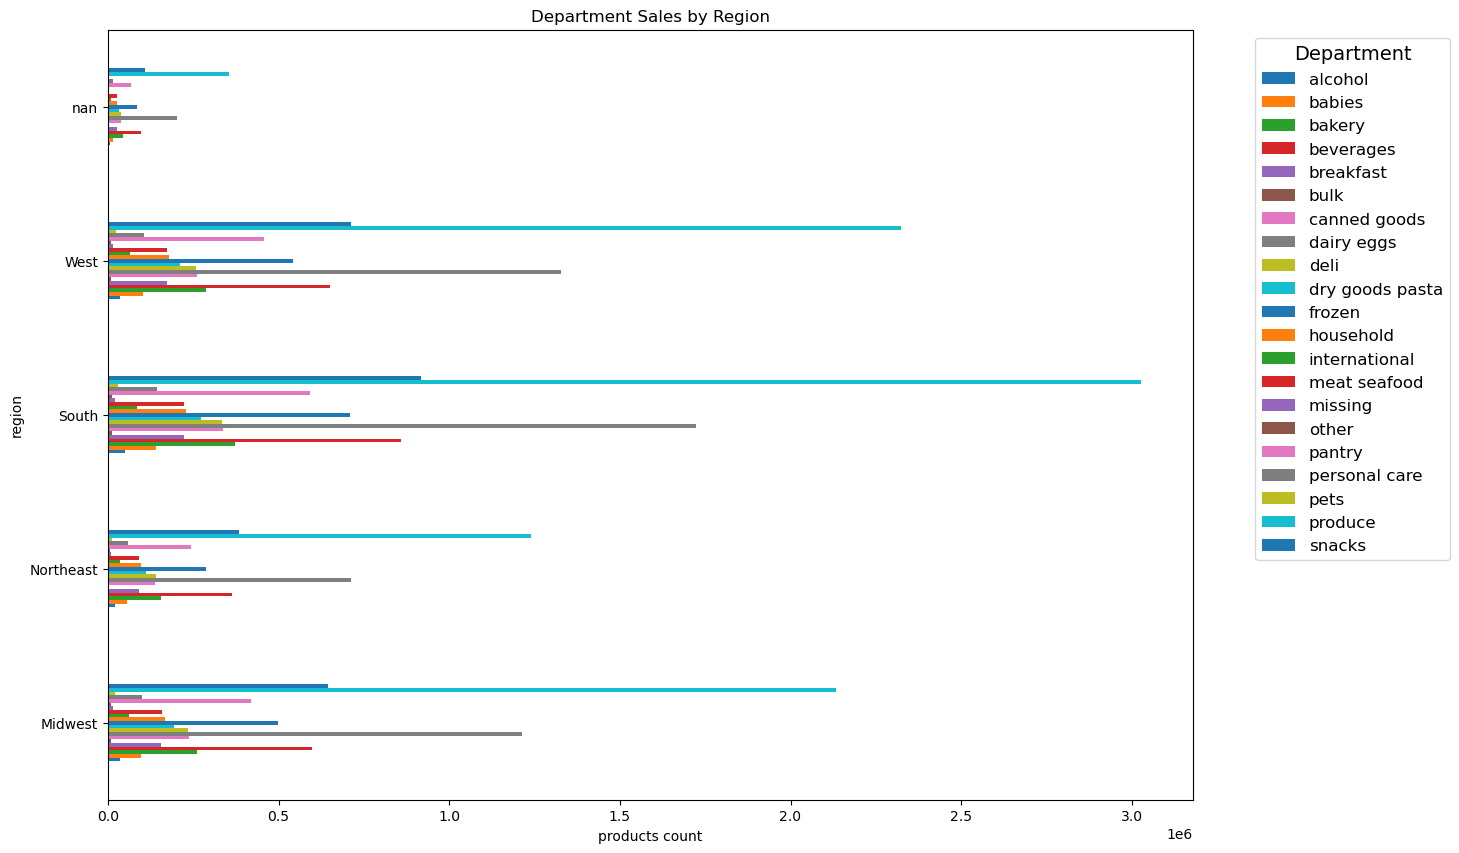

In [195]:
# bar chart
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [197]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_depts_bar.png'))

In [199]:
# import orders_products_customers
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))

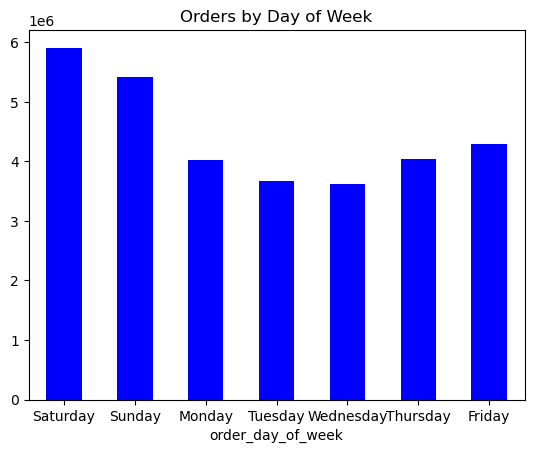

In [203]:
#GPT Bar chart for orders by day of week
orders_dow_bar = df['order_day_of_week'].value_counts().sort_index().plot.bar(color='blue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
plt.show()


In [201]:
# bar chart orders by day of week
orders_dow_bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'blue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

KeyError: 'orders_day_of_week'

In [205]:
# Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar.png'))

Text(0.5, 0, 'Hour of Day (24 hr clock)')

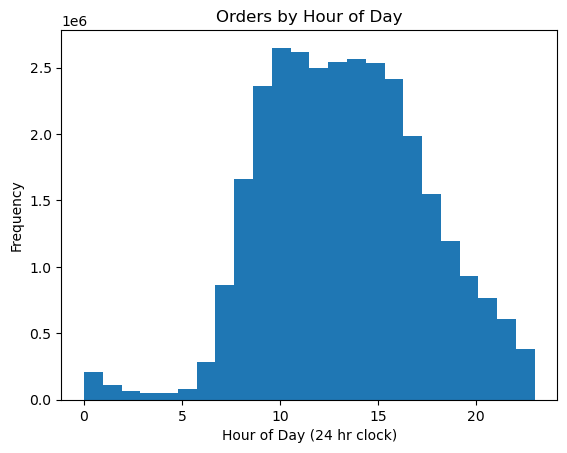

In [207]:
# histogram of hours of the day
hod_hist=df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [209]:
# Export histogram
hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hod_hist.png'))

In [211]:
# Crosstab loyalty with age group
loyalty_income_cross = pd.crosstab(df['loyalty_flag'], df['income_group'], dropna = False)
loyalty_income_cross

income_group,high-income,low-income,middle-income
loyalty_flag,,,
Loyal,3293278,3067060,18782244
Non-loyal,601231,1385318,3835387


(array([0, 1]), [Text(0, 0, 'Loyal'), Text(1, 0, 'Non-loyal')])

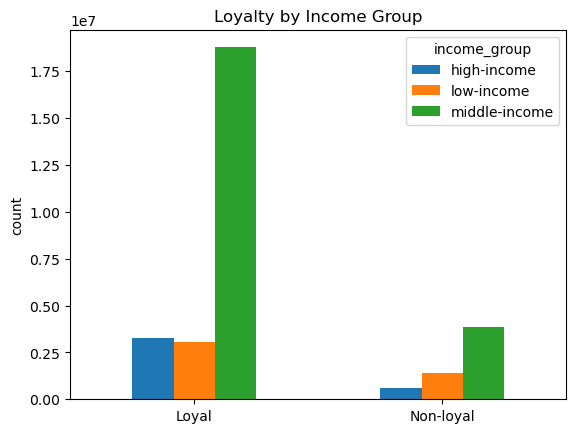

In [213]:
# bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [215]:
# Export the chart
loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_group_bar.png'))

In [217]:
# Crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(df['loyalty_flag'], df['spender_flag'], dropna = False)
loyalty_spender_cross

spender_flag,True
loyalty_flag,
Loyal,25142582
Non-loyal,5821936


(array([0, 1]), [Text(0, 0, 'Loyal'), Text(1, 0, 'Non-loyal')])

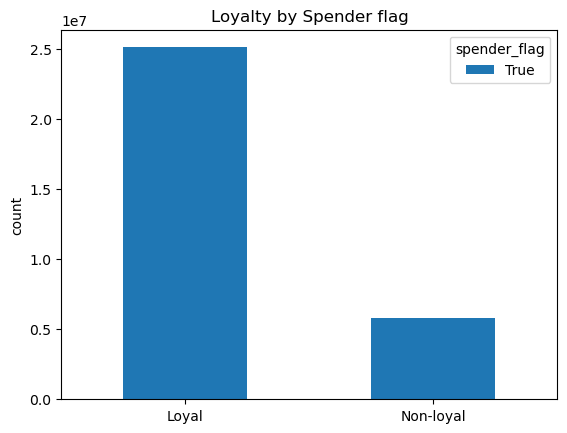

In [219]:
# bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spender flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [221]:
# Export the chart
loyalty_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spender_bar.png'))

In [223]:
# Crosstab loyalty with family status
loyalty_fam_cross = pd.crosstab(df['loyalty_flag'], df['fam_status'], dropna = False)
loyalty_fam_cross

fam_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal,2160279,1210998,17642976,4128329
Non-loyal,484992,270174,4100724,966046


(array([0, 1]), [Text(0, 0, 'Loyal'), Text(1, 0, 'Non-loyal')])

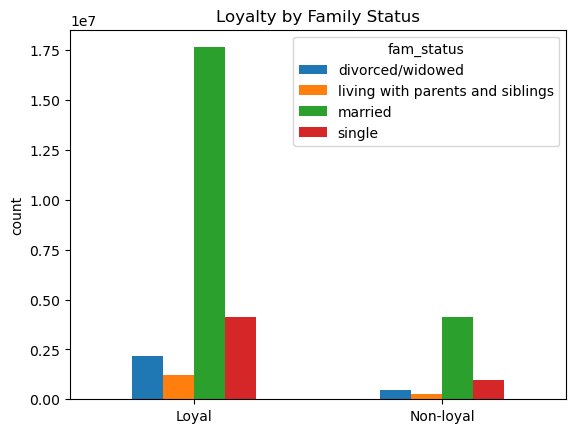

In [225]:
# bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [227]:
# Export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_fam_bar.png'))

In [229]:
# Crosstab loyalty with dependants
loyalty_depend_cross = pd.crosstab(df['loyalty_flag'], df['dependants_flag'], dropna = False)
loyalty_depend_cross

dependants_flag,has dependants,no dependants
loyalty_flag,,
Loyal,18853974,6288608
Non-loyal,4370898,1451038


(array([0, 1]), [Text(0, 0, 'Loyal'), Text(1, 0, 'Non-loyal')])

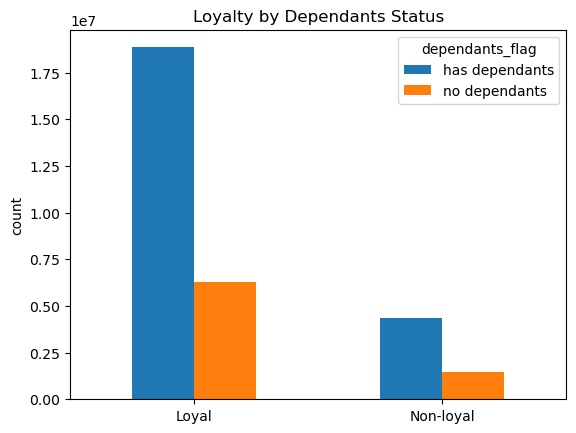

In [231]:
# bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [233]:
# Check value counts
fam_status = df['fam_status'].value_counts(dropna = False)
fam_status

fam_status
married                             21743700
single                               5094375
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

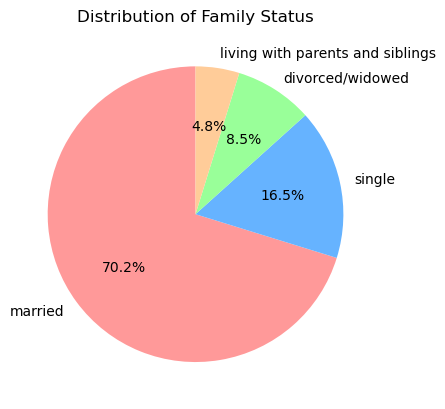

In [235]:
# Pie chart showing the distribution of family status
fam_status_distribution_pie = fam_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Family Status')
plt.show()

In [237]:
# Export the chart
fam_status_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_bar.png'))